# Problem Statement.

- This dataset is about Health insurance company which collects data from hospitals to predict whether the claim was genuine or fake.
- This dataset includes:
    - Total Columns = 24
    - Total records = 1048575
- This dataset has 24 columns which are as follows:
     1. Area_Service                     
     2. Hospital County                     
     3. Hospital Id                          
     4. Age                                   
     5. Gender                                
     6. Cultural_group                    
     7. ethnicity                             
     8. Days_spend_hsptl                
     9. Admission_type                    
     10. Home or self care,                
     11. ccs_diagnosis_code              
     12. ccs_procedure_code            
     13. apr_drg_description              
     14. Code_illness                          
     15. Mortality risk                       
     16. Surg_Description                
     17. Weight_baby                         
     18. Abortion                               
     19. Emergency dept_yes/No        
     20. Tot_charg                         
     21. Tot_cost                               
     22. ratio_of_total_costs_to_total_charges 
     23. Result                                  
     24. Payment_Typology                      


**The goal of this project is the build a model which can predict whether the claim is genuine or not.**

# Exploratory Data Analysis

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Insurance Dataset.csv')
df.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [3]:
#Data description
df.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [4]:
df.describe(include='O')

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",apr_drg_description,Surg_Description,Abortion,Emergency dept_yes/No
count,1046119,1046119,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,7,51,5,3,4,3,120,6,19,316,3,2,2
top,Hudson Valley,Erie,70 or Older,F,White,Not Span/Hispanic,2,Emergency,Home or Self Care,"Neonate birthwt >2499g, normal newborn or neon...",Medical,N,Y
freq,261074,129242,306017,593506,781658,910555,236538,608595,694841,80169,805729,1047110,589954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

# Handeling Missing Values

In [6]:
#Checkin for null values

df.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

<AxesSubplot:>

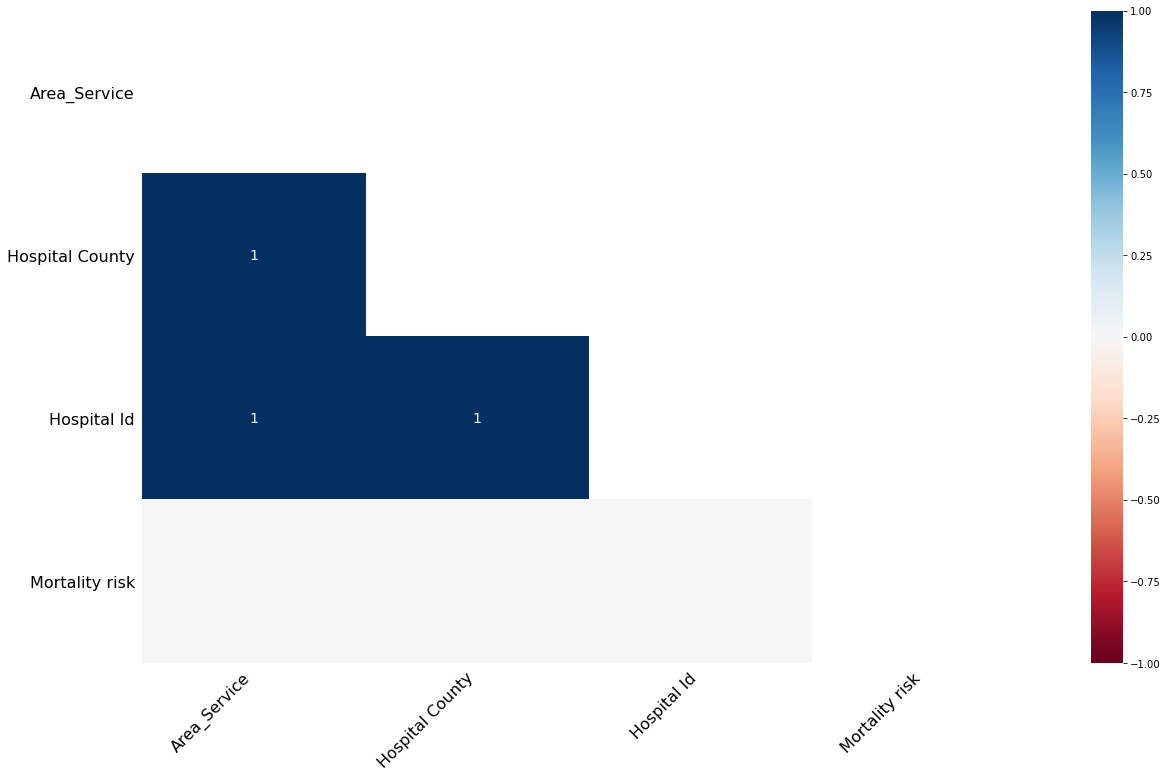

In [7]:
import missingno as msno
msno.heatmap(df)

- As we can see that there are 4 columns which have missing values.

In [8]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
12,NaN,NaN,NaN,30 to 49,M,Other Race,Not Span/Hispanic,2,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,2896.70,3834.01,1.323580,1,1
16,NaN,NaN,NaN,30 to 49,M,White,Spanish/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3472.25,4069.85,1.172107,1,1
33,NaN,NaN,NaN,70 or Older,F,White,Spanish/Hispanic,1,Urgent,Home or Self Care,...,3.0,Medical,0,N,Y,2509.75,2636.72,1.050590,1,1
77,NaN,NaN,NaN,70 or Older,F,Black/African American,Not Span/Hispanic,3,Elective,Skilled Nursing Home,...,2.0,Medical,0,N,N,2998.00,3215.64,1.072593,1,2
86,NaN,NaN,NaN,30 to 49,F,White,Spanish/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,4806.25,5225.46,1.087221,1,1


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Area_Service,Area_Service,0.234223
Hospital County,Hospital County,0.234223
Hospital Id,Hospital Id,0.234223
Age,Age,0.000000
Gender,Gender,0.000000
Cultural_group,Cultural_group,0.000000
ethnicity,ethnicity,0.000000
Days_spend_hsptl,Days_spend_hsptl,0.000000
Admission_type,Admission_type,0.000000
"Home or self care,","Home or self care,",0.000000


- As the number of missing values in dataset is very less, we can directly remove them.

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1046077, 24)

# Handeling Duplicate Values

In [12]:
df.duplicated(keep='first').sum()

4812

In [13]:
df.loc[df.duplicated(keep='first'),:]

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,39.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,...,1.0,Medical,3700,N,N,1678.75,737.21,0.439141,1,1
3086,Western NY,Cattaraugus,66.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,...,1.0,Medical,3600,N,N,1251.50,829.70,0.662961,0,1
3226,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,...,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4209,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,...,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4234,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,...,1.0,Medical,2800,N,N,1150.50,788.65,0.685486,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,1168.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,...,1.0,Medical,2900,N,N,5955.85,1303.62,0.218881,1,3
1025529,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,...,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3
1028997,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,...,1.0,Medical,0,N,N,12557.00,2963.40,0.235996,1,2
1035973,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,...,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3


In [14]:
dup = df.duplicated().sum()
n = len(df)
percentage_of_duplicates = (dup*100)/n
print(f'The percentage of duplicate values in the dataset is: {percentage_of_duplicates}')

The percentage of duplicate values in the dataset is: 0.4600043782627856


- As the percentage of duplicated values is very low, we can delete these duplicate values.

In [15]:
df.drop_duplicates(keep='first', inplace=True)

In [16]:
df.shape

(1041265, 24)

# Data Visualisation

In [17]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)

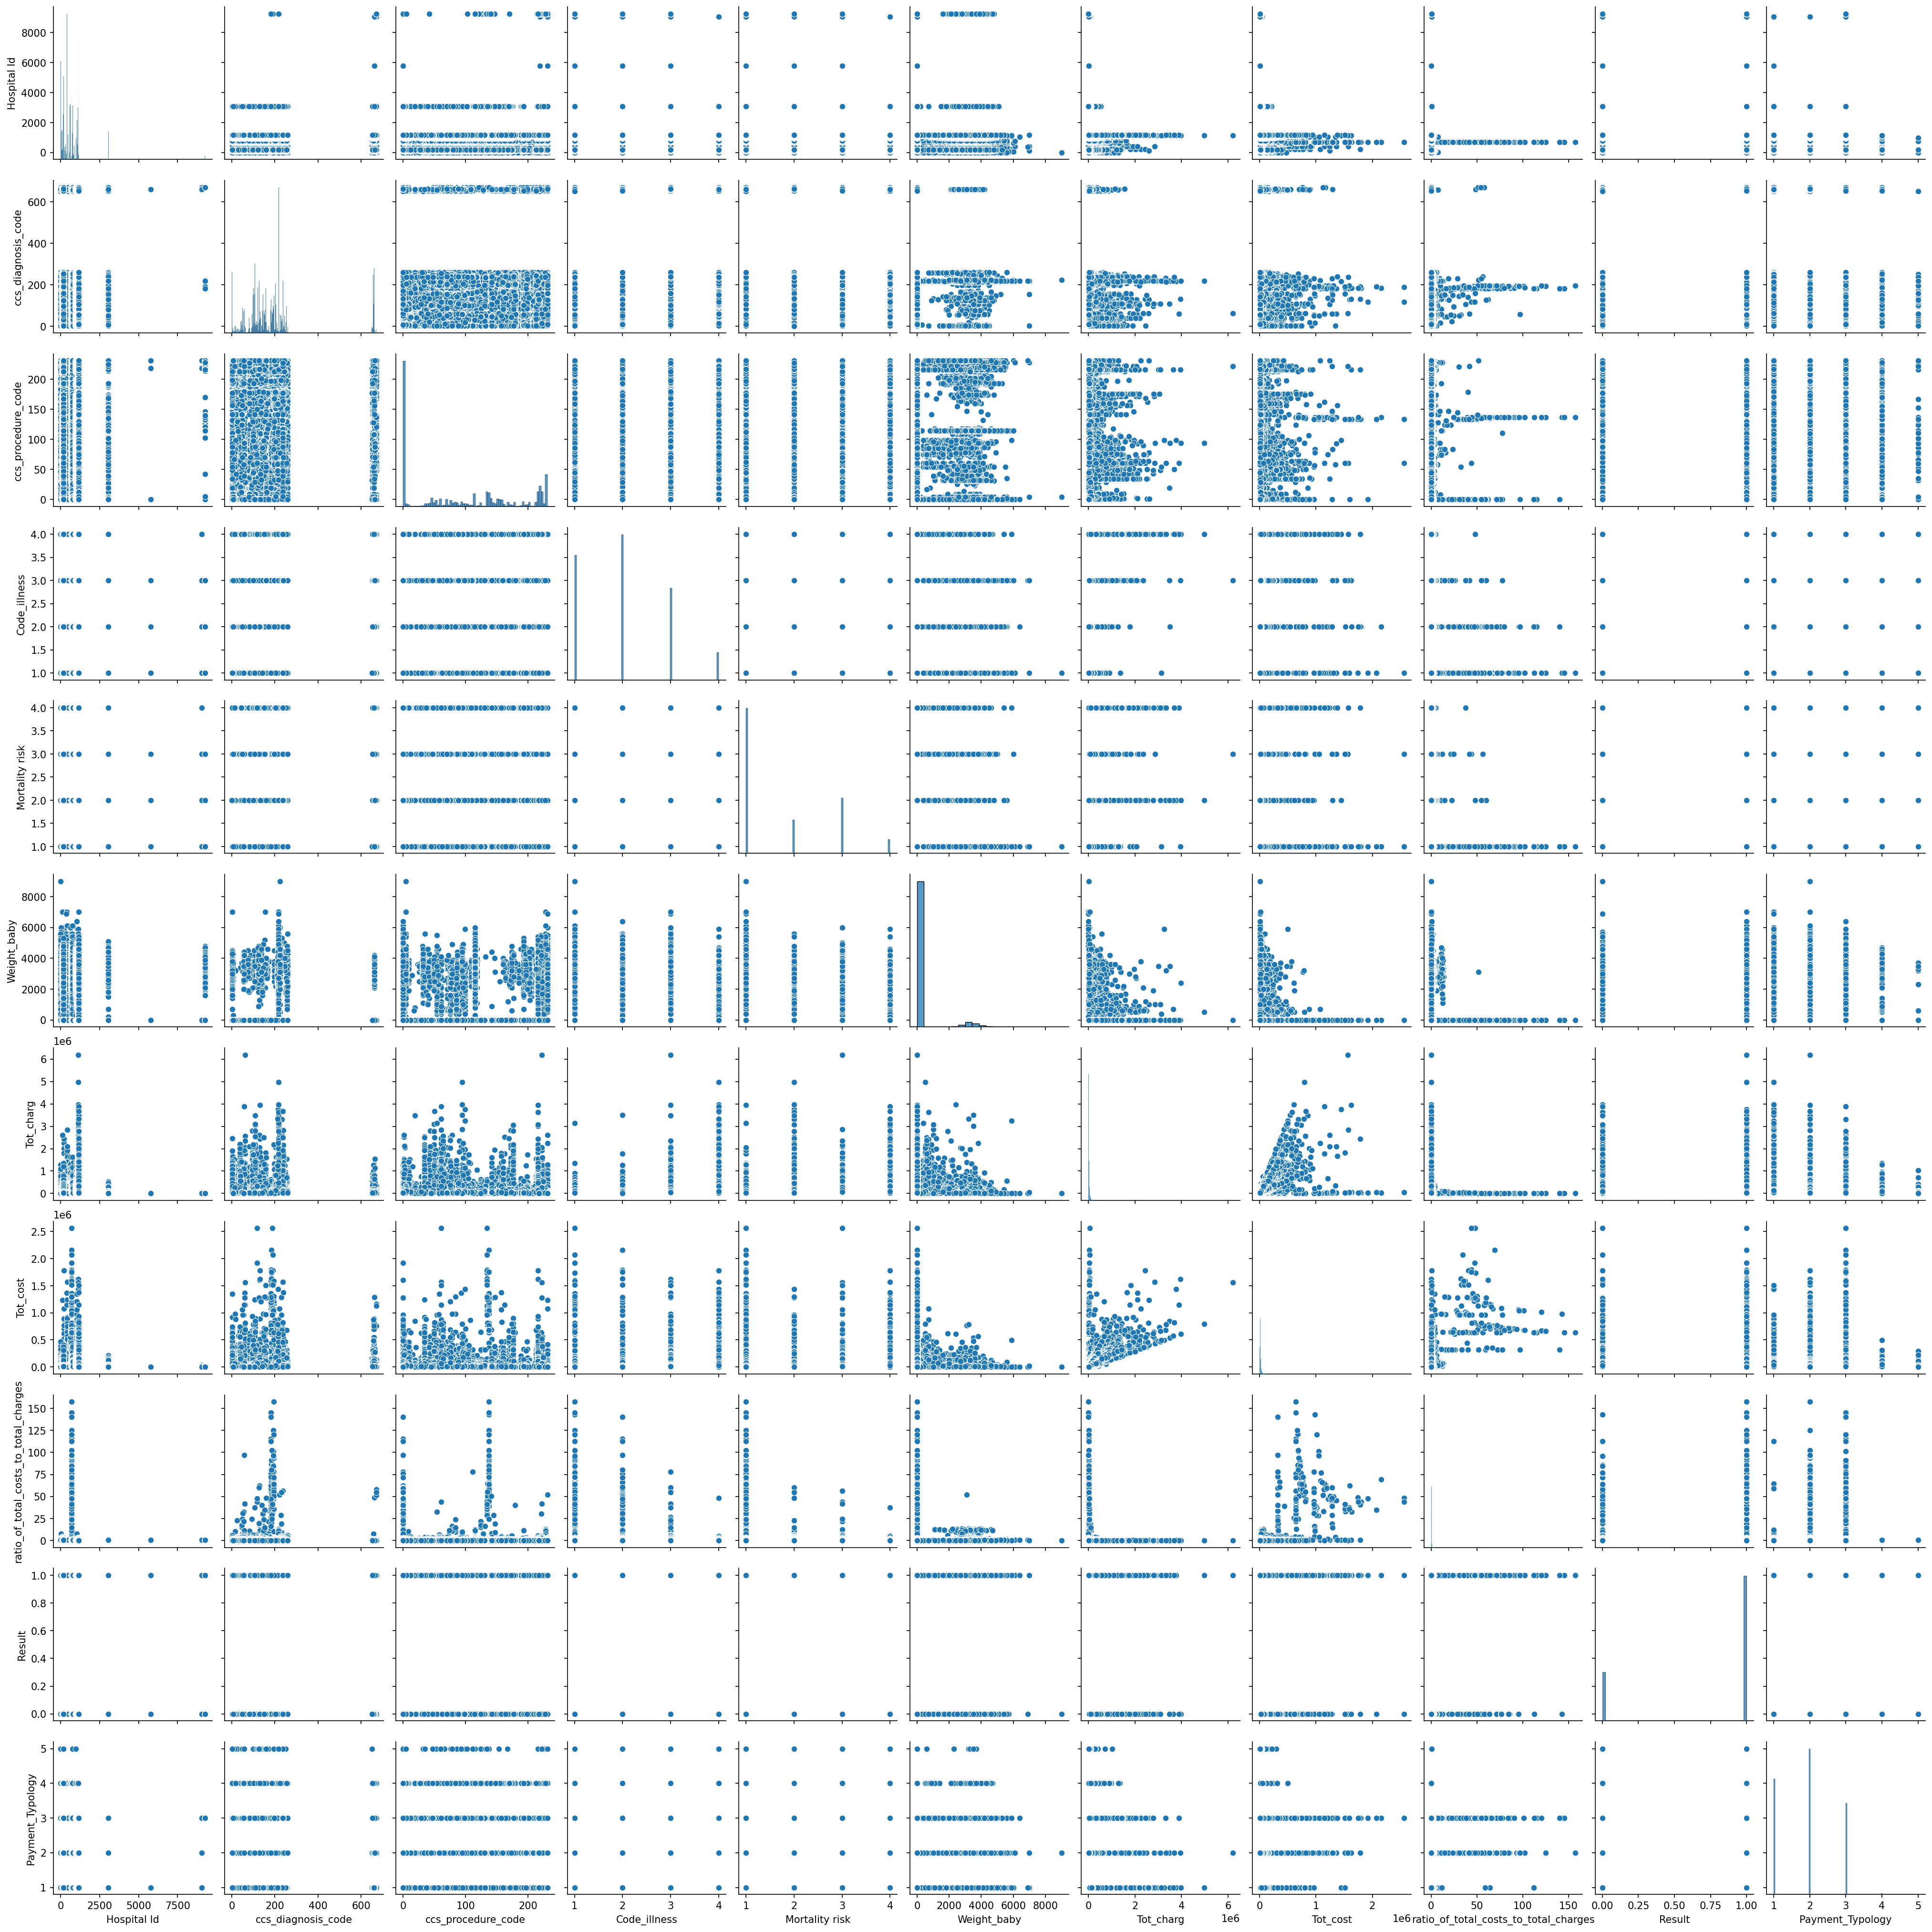

In [18]:
sns.pairplot(df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

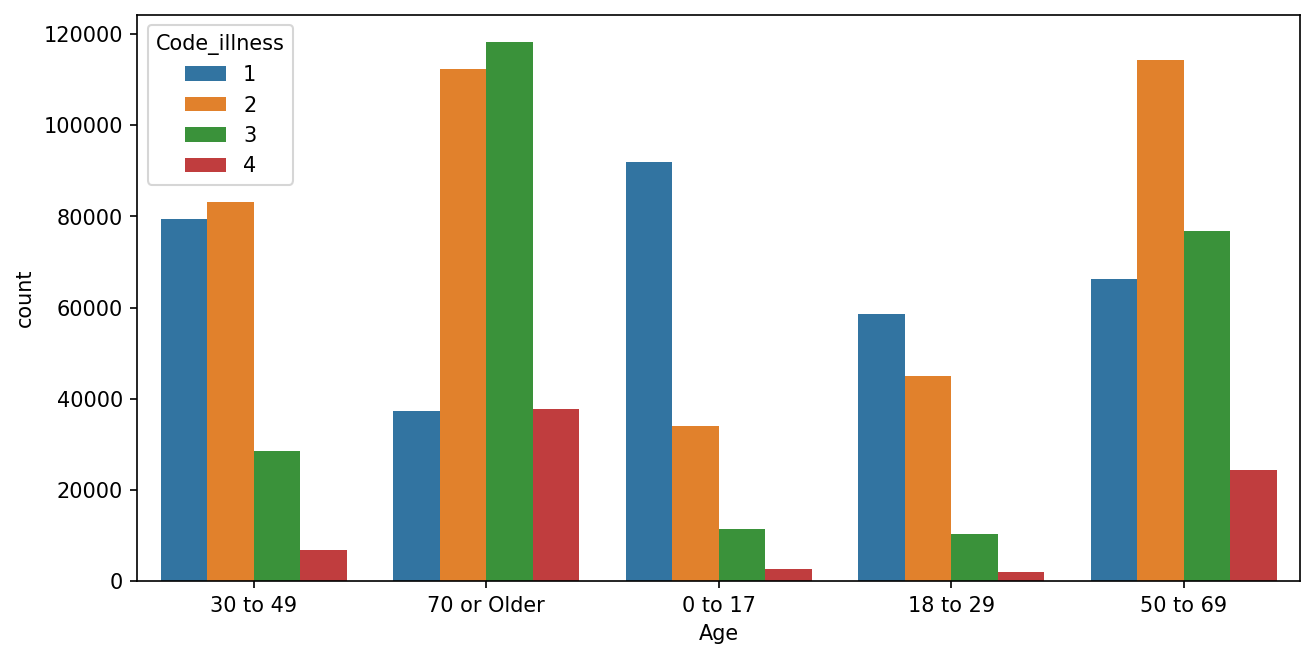

In [19]:
sns.countplot('Age', hue='Code_illness', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mortality risk', ylabel='count'>

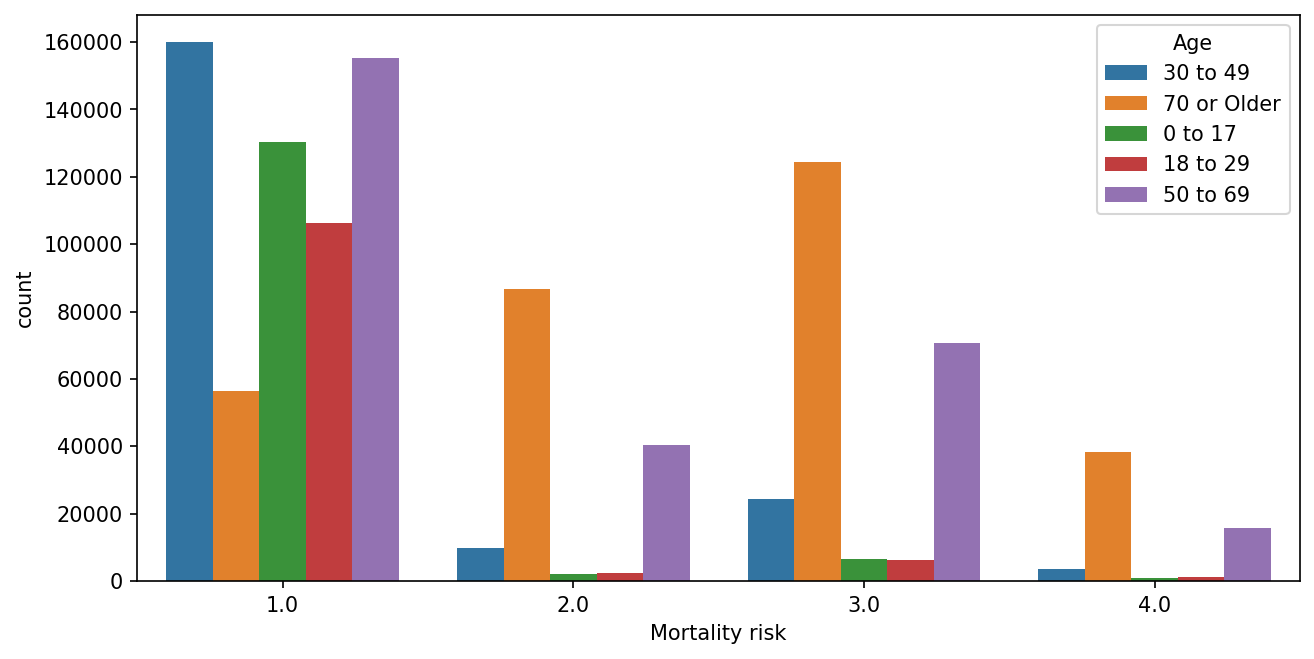

In [20]:
sns.countplot('Mortality risk', hue='Age', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tot_charg', ylabel='Tot_cost'>

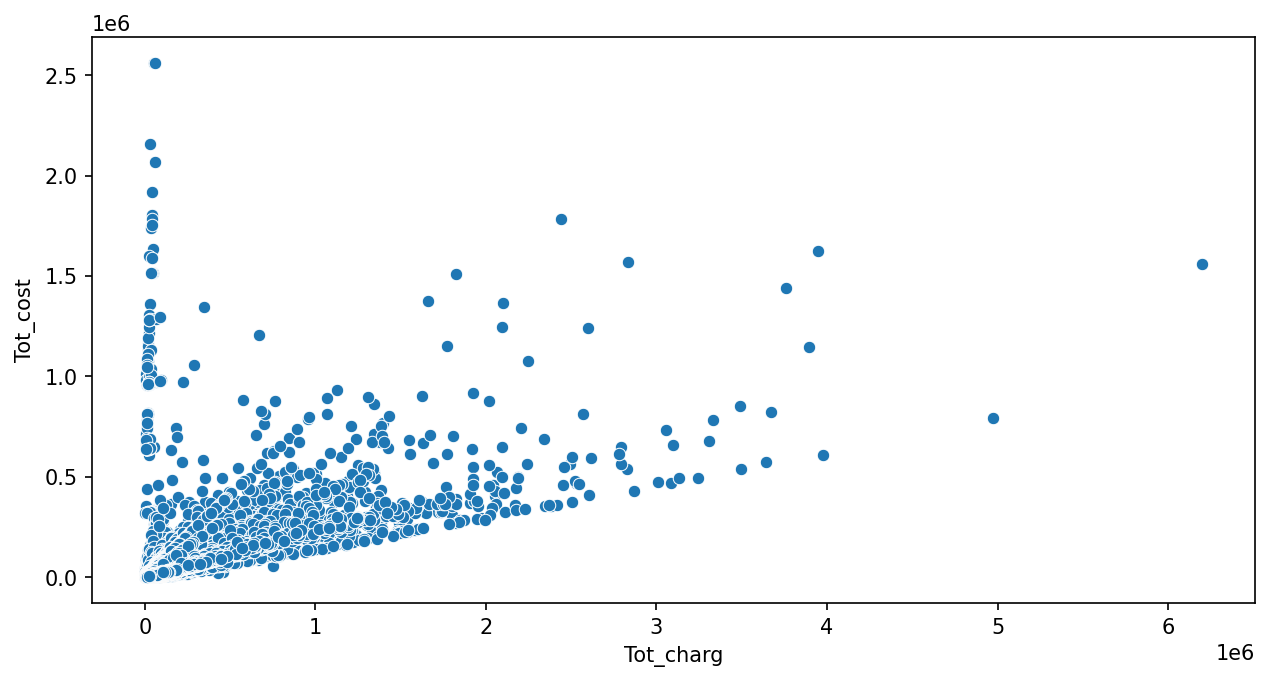

In [21]:
sns.scatterplot(df['Tot_charg'], df['Tot_cost'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emergency dept_yes/No', ylabel='count'>

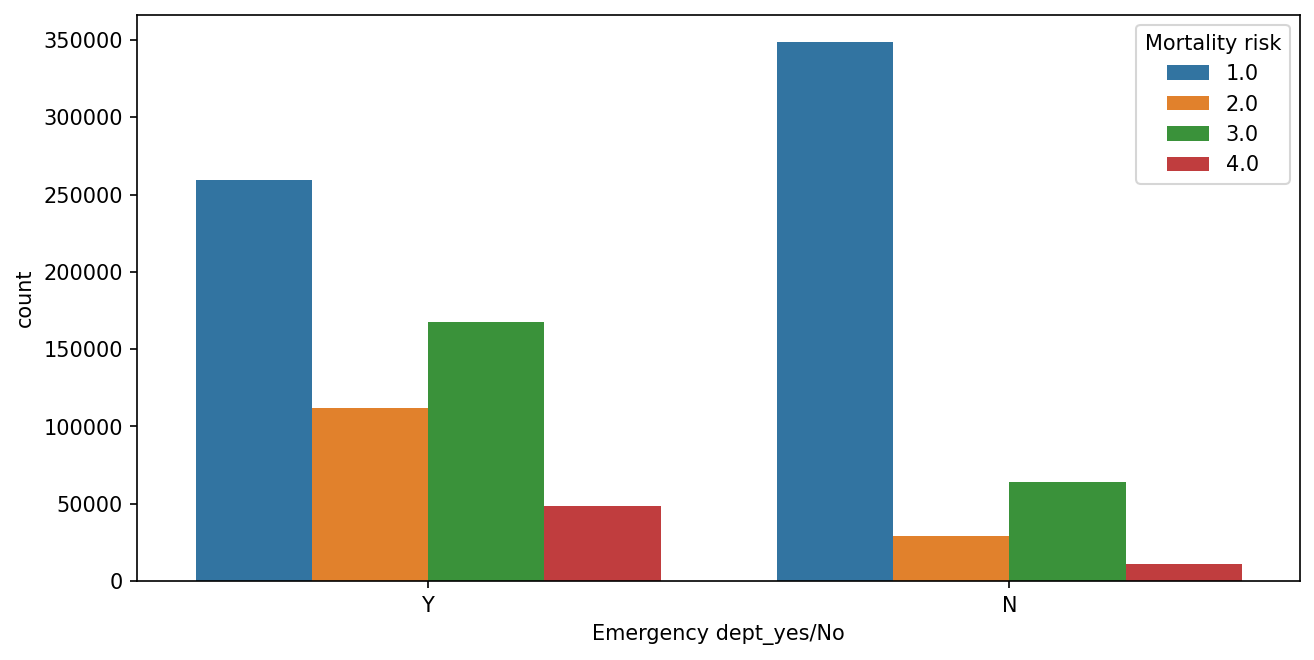

In [22]:
sns.countplot(df['Emergency dept_yes/No'],hue = df['Mortality risk'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

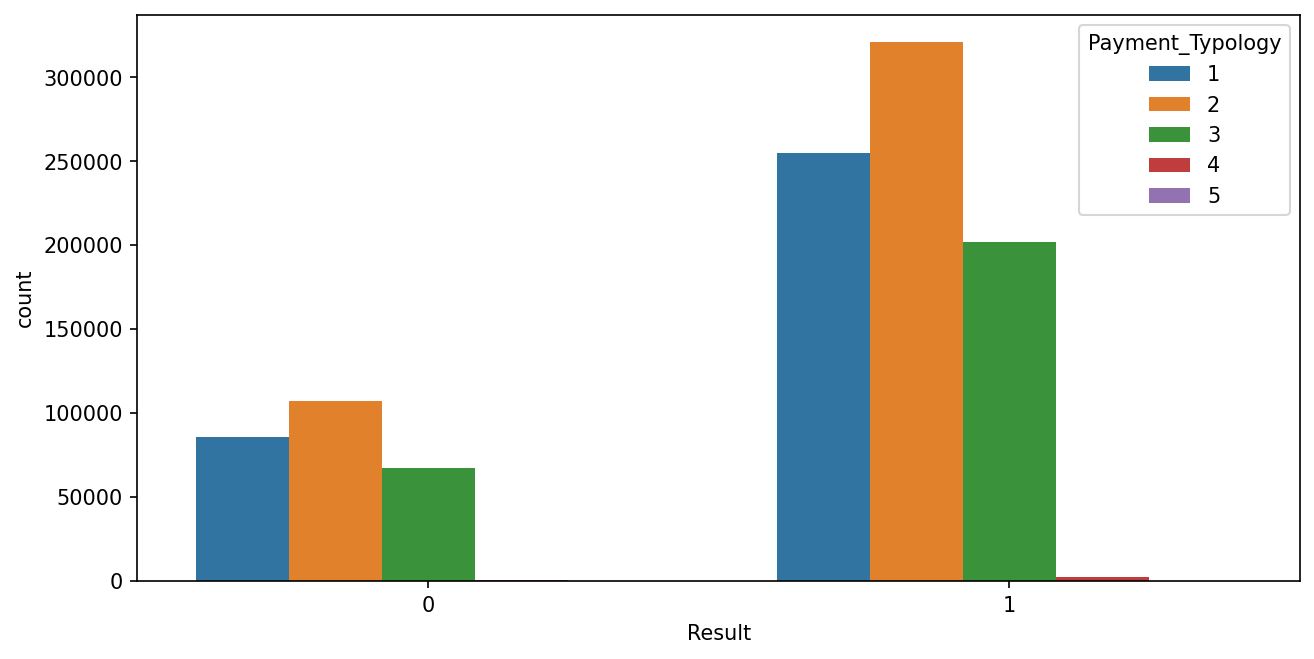

In [23]:
sns.countplot(df['Result'], hue=df['Payment_Typology'])

<AxesSubplot:>

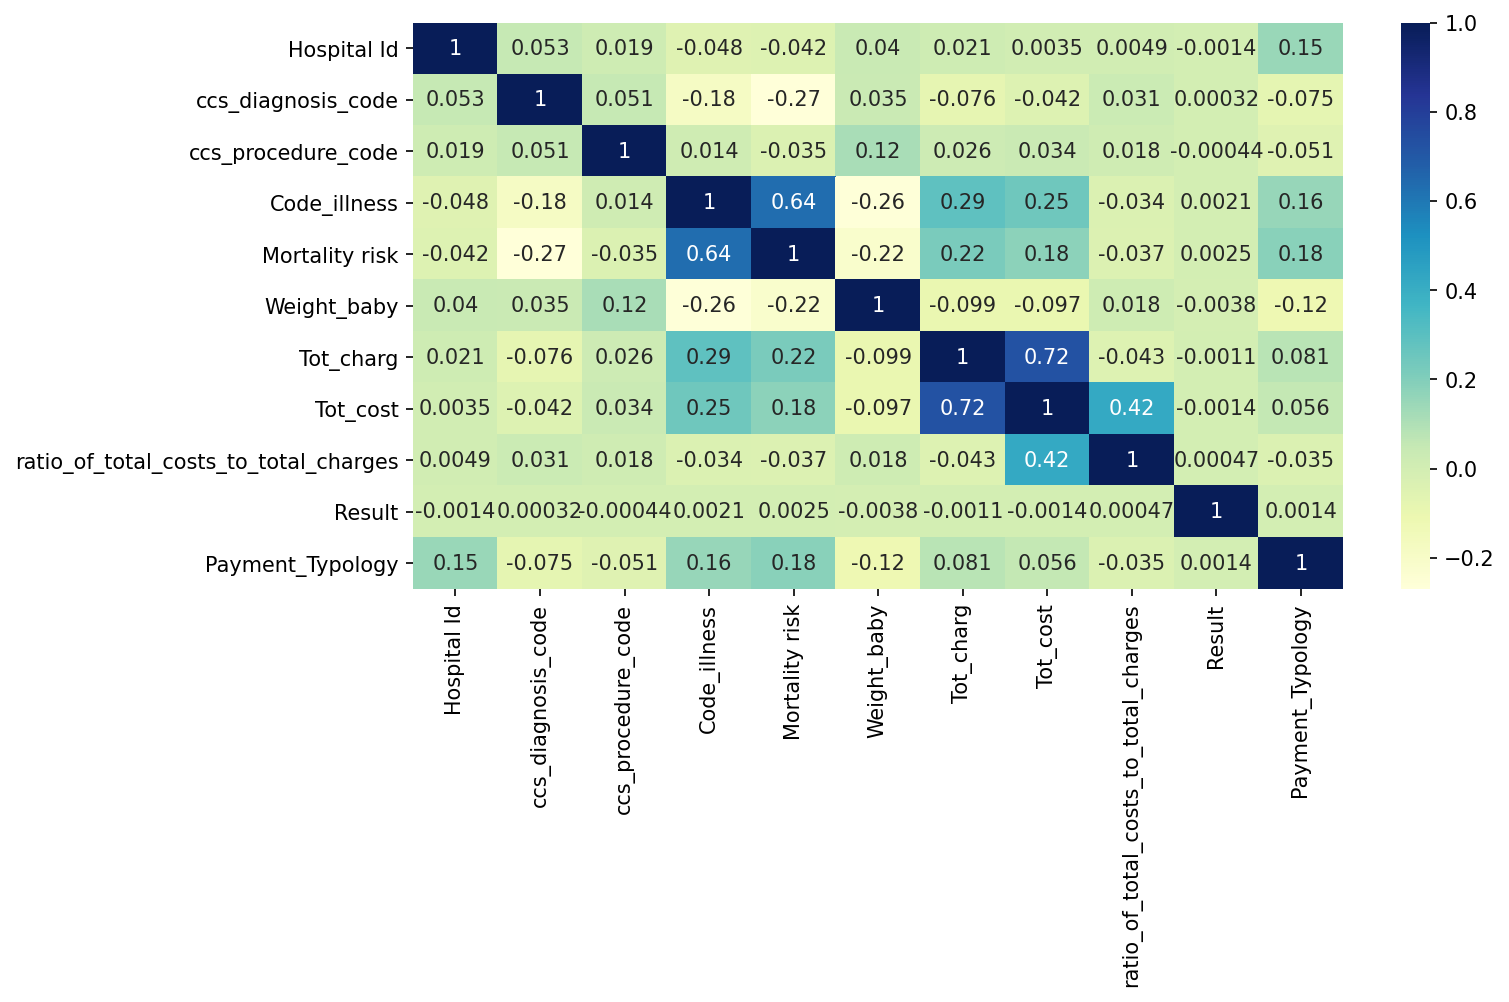

In [24]:
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

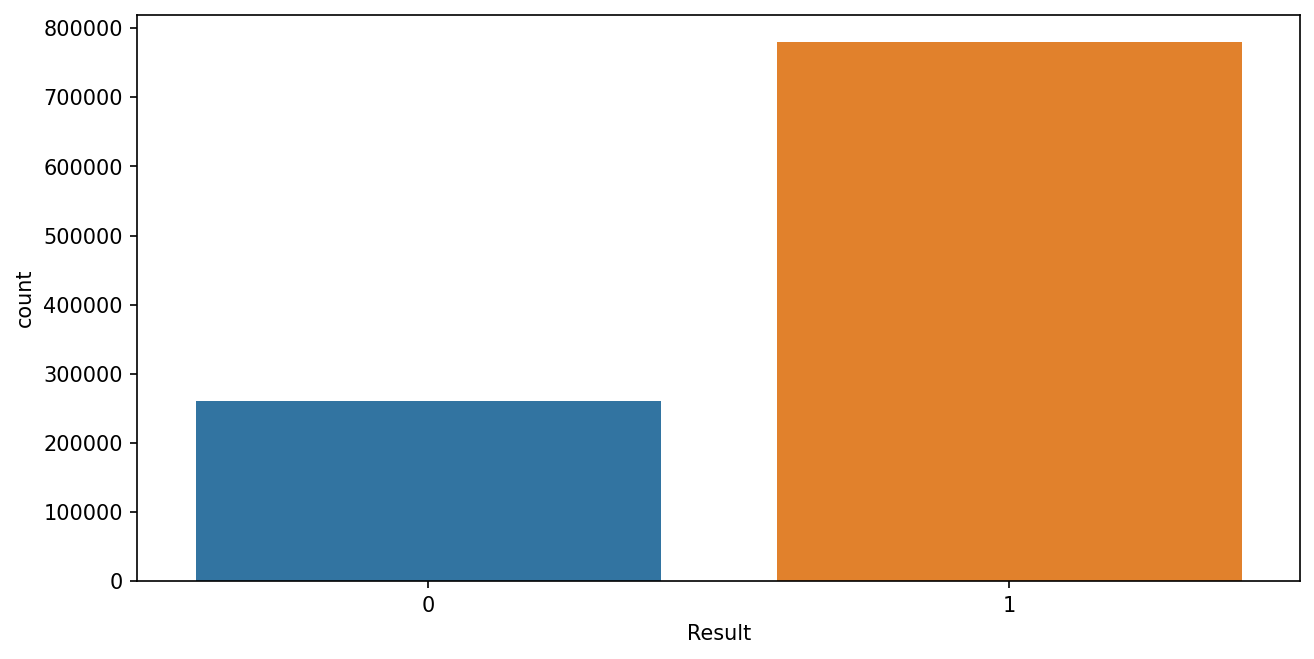

In [25]:
sns.countplot(df['Result'])

- There are few unknown values in few columns of the dataset.
- We need to handle them.
- As the number of the unknown values are so less, we'll delete them.

In [26]:
df.drop(df.loc[df['Gender']=='U'].index, inplace=True)
df.drop(df.loc[df['Cultural_group']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['ethnicity']=='Unknown'].index, inplace=True)
df.drop(df.loc[df['Admission_type']=='Not Available'].index, inplace=True)

# Encoding Categorical Values.

In [27]:
cat_list =df.select_dtypes(include='object')
cat_list.columns

Index(['Area_Service', 'Hospital County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home or self care,',
       'apr_drg_description', 'Surg_Description', 'Abortion',
       'Emergency dept_yes/No'],
      dtype='object')

In [28]:
df['Age'] = df['Age'].map({'0 to 17': 1,'18 to 29': 2,'30 to 49': 3,'50 to 69': 4,'70 or Older': 5})
df['Admission_type'] = df['Admission_type'].map({'Emergency': 1,'Urgent': 2,'Elective': 3,'Newborn': 4,'Trauma': 5})
df['Emergency dept_yes/No'] = df['Emergency dept_yes/No'].map({'Y':1,'N':0})

In [29]:
df['Days_spend_hsptl'] = df['Days_spend_hsptl'].replace('120 +','120')
df['Days_spend_hsptl'] = df['Days_spend_hsptl'].astype(int)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cat_cols = list(df.select_dtypes(include=['O']).columns)
print(cat_cols)
print('Number of object categories: ',len(cat_cols))

['Area_Service', 'Hospital County', 'Gender', 'Cultural_group', 'ethnicity', 'Home or self care,', 'apr_drg_description', 'Surg_Description', 'Abortion']
Number of object categories:  9


In [32]:
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)
df.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,6,1,37.0,3,0,2,0,4,3,7,...,1.0,0,0,0,1,5511.95,5582.49,1.012798,1,1
1,6,1,37.0,5,0,2,0,4,2,17,...,2.0,0,0,0,1,4783.20,5162.82,1.079365,1,1
2,6,1,37.0,3,0,2,0,3,2,7,...,1.0,0,0,0,1,3829.15,4056.52,1.059379,1,1
3,6,1,37.0,1,0,2,0,1,2,7,...,1.0,0,0,0,1,1108.20,1644.75,1.484167,0,1
4,6,1,37.0,5,0,2,0,3,3,7,...,3.0,0,0,0,1,3418.18,3370.87,0.986161,1,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990494 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Area_Service                           990494 non-null  int32  
 1   Hospital County                        990494 non-null  int32  
 2   Hospital Id                            990494 non-null  float64
 3   Age                                    990494 non-null  int64  
 4   Gender                                 990494 non-null  int32  
 5   Cultural_group                         990494 non-null  int32  
 6   ethnicity                              990494 non-null  int32  
 7   Days_spend_hsptl                       990494 non-null  int32  
 8   Admission_type                         990494 non-null  int64  
 9   Home or self care,                     990494 non-null  int32  
 10  ccs_diagnosis_code                     990494 non-null 

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scalar = StandardScaler()
x = df.drop(columns='Result')
y = df['Result']

In [36]:
x_scaled = scalar.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology
0,1.637674,-1.510840,-0.910684,-0.362298,-0.877428,0.54323,-0.309779,-0.183270,1.130301,-0.436518,...,-1.163316,-0.768165,-0.553290,-0.29531,0.0,0.869407,-0.397201,-0.223091,0.683746,-1.240890
1,1.637674,-1.510840,-0.910684,1.108114,-0.877428,0.54323,-0.309779,-0.183270,0.183965,2.179808,...,1.022065,0.241863,-0.553290,-0.29531,0.0,0.869407,-0.410217,-0.241557,0.764927,-1.240890
2,1.637674,-1.510840,-0.910684,-0.362298,-0.877428,0.54323,-0.309779,-0.308753,0.183965,-0.436518,...,-1.163316,-0.768165,-0.553290,-0.29531,0.0,0.869407,-0.427257,-0.290234,0.740553,-1.240890
3,1.637674,-1.510840,-0.910684,-1.832710,-0.877428,0.54323,-0.309779,-0.559721,0.183965,-0.436518,...,-1.163316,-0.768165,-0.553290,-0.29531,0.0,0.869407,-0.475856,-0.396352,1.258595,-1.240890
4,1.637674,-1.510840,-0.910684,1.108114,-0.877428,0.54323,-0.309779,-0.308753,1.130301,-0.436518,...,-0.070625,1.251890,-0.553290,-0.29531,0.0,0.869407,-0.434598,-0.320403,0.651262,-1.240890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990489,0.634549,-1.443776,0.750955,1.108114,-0.877428,-0.86370,3.228110,0.067698,-0.762372,2.441441,...,-0.070625,1.251890,-0.553290,-0.29531,0.0,0.869407,0.748384,0.142740,-0.308067,1.354832
990490,0.634549,-1.443776,0.750955,-1.832710,-0.877428,-0.86370,-0.309779,-0.434237,-0.762372,-0.436518,...,-0.070625,-0.768165,-0.553290,-0.29531,0.0,-1.150210,-0.252964,-0.296314,-0.199700,1.354832
990491,0.634549,-1.443776,0.750955,0.372908,1.139694,-0.86370,3.228110,0.946085,-0.762372,1.656543,...,2.114756,2.261918,-0.553290,-0.29531,0.0,0.869407,1.373155,0.620133,-0.262952,1.354832
990492,0.634549,-1.443776,0.750955,-0.362298,-0.877428,-2.27063,-0.309779,-0.434237,-0.762372,-0.436518,...,-1.163316,-0.768165,1.807372,-0.29531,0.0,0.869407,-0.004087,-0.171015,-0.251573,1.354832


# Feature Selection

In [37]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [38]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(x_scaled)

VarianceThreshold(threshold=0)

In [39]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [40]:
constant_column = [column for column in x_scaled.columns
                  if column not in x_scaled.columns[var_thres.get_support()]]
print(len(constant_column))
print(f'The feature with zero variance is: {constant_column}')

1
The feature with zero variance is: ['Abortion']


In [41]:
x = x_scaled
y = df['Result']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([1.45931752e-02, 6.21357555e-03, 6.13787250e-04, 2.39480505e-02,
       5.71024881e-02, 5.38253985e-02, 3.64066496e-02, 5.04380729e-03,
       3.90481456e-02, 2.17466362e-02, 1.29953992e-03, 1.87666227e-02,
       9.81247526e-04, 2.84802826e-02, 3.71775658e-02, 5.70260954e-02,
       3.33271530e-02, 2.45036548e-05, 5.69476743e-02, 0.00000000e+00,
       0.00000000e+00, 2.96368854e-04, 2.88602989e-02])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Gender                                   0.057102
Surg_Description                         0.057026
Emergency dept_yes/No                    0.056948
Cultural_group                           0.053825
Admission_type                           0.039048
Mortality risk                           0.037178
ethnicity                                0.036407
Weight_baby                              0.033327
Payment_Typology                         0.028860
Code_illness                             0.028480
Age                                      0.023948
Home or self care,                       0.021747
ccs_procedure_code                       0.018767
Area_Service                             0.014593
Hospital County                          0.006214
Days_spend_hsptl                         0.005044
ccs_diagnosis_code                       0.001300
apr_drg_description                      0.000981
Hospital Id                              0.000614
ratio_of_total_costs_to_total_charges    0.000296


<AxesSubplot:>

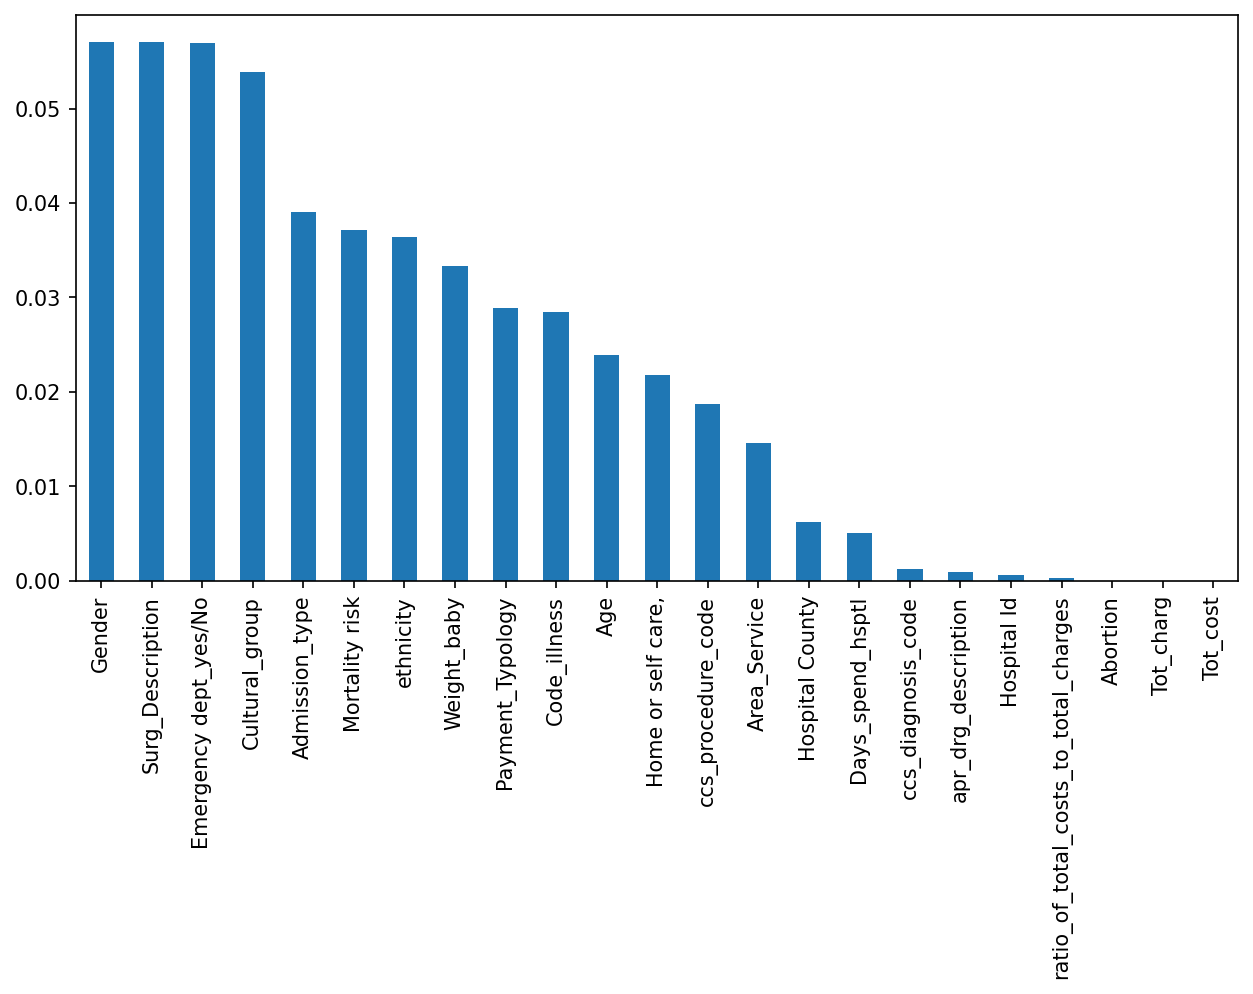

In [45]:
mutual_info.sort_values(ascending=False).plot.bar()

In [46]:
x_scaled.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology'],
      dtype='object')

# Dropping Unwanted Columns

In [47]:
x_final = x_scaled.drop(columns=['Days_spend_hsptl','Hospital County','apr_drg_description','ccs_diagnosis_code',
                                 'Hospital Id','Abortion','Tot_cost'])

In [48]:
x_final.shape, y.shape

((990494, 16), (990494,))

# Checking for imbalance in dataset.

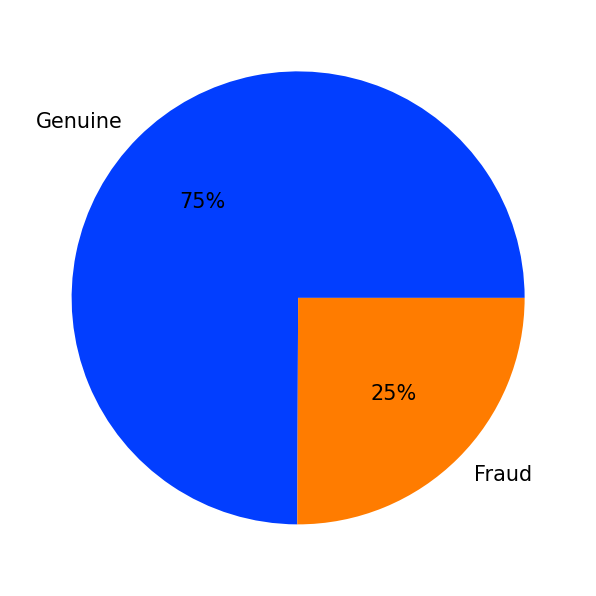

In [49]:
labels = ['Genuine','Fraud']
colors = sns.color_palette('bright')[0:5]

plt.figure(figsize=(10,5))
plt.pie(y.value_counts(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

- As we can see that the target column is imbalanced. If we dont balance it, it will impact our model.
- We will do oversampling to balance this data.

# Oversampling

In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
os = RandomOverSampler()

In [52]:
x_res,y_res = os.fit_resample(x_final,y)
x_res.shape,y_res.shape

((1484544, 16), (1484544,))

In [53]:
from collections import Counter
print('original dataset shape{}'.format(Counter(y)))
print('resampled dataset shape{}'.format(Counter(y_res)))

original dataset shapeCounter({1: 742272, 0: 248222})
resampled dataset shapeCounter({1: 742272, 0: 742272})


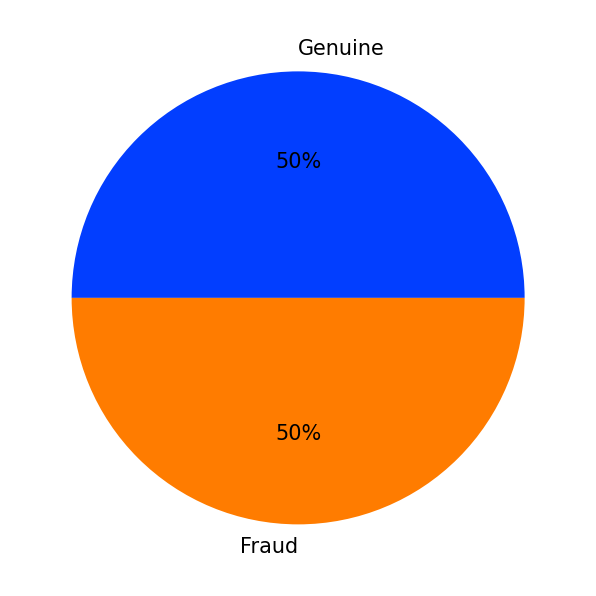

In [54]:
labels = ['Genuine','Fraud']
colors = sns.color_palette('bright')[0:5]

plt.figure(figsize=(10,5))
plt.pie(y_res.value_counts(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [55]:
cleaned_df = pd.concat([x_res, y_res], axis=1)
cleaned_df

,Area_Service,Age,Gender,Cultural_group,ethnicity,Admission_type,"Home or self care,",ccs_procedure_code,Code_illness,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,1.637674,-0.362298,-0.877428,0.54323,-0.309779,1.130301,-0.436518,-1.109238,-1.163316,-0.768165,-0.553290,-0.29531,0.869407,-0.397201,0.683746,-1.240890,1
1,1.637674,1.108114,-0.877428,0.54323,-0.309779,0.183965,2.179808,-1.109238,1.022065,0.241863,-0.553290,-0.29531,0.869407,-0.410217,0.764927,-1.240890,1
2,1.637674,-0.362298,-0.877428,0.54323,-0.309779,0.183965,-0.436518,-1.109238,-1.163316,-0.768165,-0.553290,-0.29531,0.869407,-0.427257,0.740553,-1.240890,1
3,1.637674,-1.832710,-0.877428,0.54323,-0.309779,0.183965,-0.436518,-1.109238,-1.163316,-0.768165,-0.553290,-0.29531,0.869407,-0.475856,1.258595,-1.240890,0
4,1.637674,1.108114,-0.877428,0.54323,-0.309779,1.130301,-0.436518,-1.109238,-0.070625,1.251890,-0.553290,-0.29531,0.869407,-0.434598,0.651262,-1.240890,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484539,1.637674,0.372908,1.139694,0.54323,-0.309779,1.130301,-0.436518,0.702773,-1.163316,-0.768165,1.807372,-0.29531,-1.150210,-0.121495,0.074359,1.354832,0
1484540,0.132986,-1.832710,-0.877428,-2.27063,-0.309779,1.130301,-0.174885,1.379410,-0.070625,-0.768165,-0.553290,-0.29531,-1.150210,0.811985,0.001854,0.056971,0
1484541,-1.371702,-0.362298,-0.877428,-0.86370,-0.309779,0.183965,-0.436518,0.496341,-1.163316,-0.768165,-0.553290,-0.29531,-1.150210,-0.275088,-0.010952,0.056971,0
1484542,-1.371702,-1.097504,-0.877428,-0.86370,-0.309779,1.130301,-0.436518,0.427530,-1.163316,-0.768165,1.807372,-0.29531,-1.150210,-0.101447,-0.147380,-1.240890,0


In [56]:
cleaned_df.to_csv(r'cleaned_df.csv')